In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [47]:
amazon = pd.read_csv('/content/amazon.csv')

In [48]:
amazon.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


In [49]:
# check for missing values
amazon.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


# there are two missing values in the rating_count

In [50]:
amazon[amazon['rating_count'].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [51]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

# changing datatypes

In [52]:
amazon['discounted_price'].unique()

array(['₹399', '₹199', '₹329', '₹154', '₹149', '₹176.63', '₹229', '₹499',
       '₹299', '₹219', '₹350', '₹159', '₹349', '₹13,999', '₹249',
       '₹13,490', '₹970', '₹279', '₹59', '₹11,499', '₹14,999', '₹179',
       '₹389', '₹599', '₹99', '₹899', '₹32,999', '₹209', '₹19,999',
       '₹999', '₹333', '₹507', '₹309', '₹1,199', '₹799', '₹6,999', '₹230',
       '₹649', '₹15,999', '₹348', '₹32,990', '₹139', '₹263', '₹7,999',
       '₹1,599', '₹26,999', '₹115', '₹10,901', '₹1,434', '₹7,299', '₹325',
       '₹29,999', '₹27,999', '₹30,990', '₹269', '₹24,999', '₹18,990',
       '₹290', '₹345', '₹1,099', '₹719', '₹849', '₹21,999', '₹449',
       '₹37,999', '₹7,390', '₹273.10', '₹15,990', '₹210', '₹1,299',
       '₹347', '₹228', '₹1,499', '₹8,499', '₹20,990', '₹9,999', '₹489',
       '₹23,999', '₹689', '₹1,699', '₹655', '₹749', '₹195', '₹416',
       '₹368', '₹29,990', '₹339', '₹15,490', '₹9,490', '₹637', '₹1,089',
       '₹12,499', '₹1,399', '₹88', '₹57.89', '₹205', '₹949', '₹379',
       '₹8,9

In [53]:
def remove_rupee_symbol(value):
    return value.replace('₹','')


def remove_comma(value):
    return value.replace(',','')
amazon['discounted_price'] =  amazon['discounted_price'].apply(remove_rupee_symbol)
amazon['discounted_price'] =  amazon['discounted_price'].apply(remove_comma)
amazon['discounted_price'] = pd.to_numeric(amazon['discounted_price'],errors = 'coerce',downcast = 'integer')

In [54]:
amazon['actual_price'] = amazon['actual_price'].apply(remove_rupee_symbol)
amazon['actual_price'] = amazon['actual_price'].apply(remove_comma)
amazon['actual_price'].value_counts()
amazon['actual_price'] = pd.to_numeric(amazon['actual_price'],errors = 'coerce',downcast = 'integer')

In [55]:
amazon['discount_percentage'] = amazon['discount_percentage'].str.replace('%','')
amazon['discount_percentage'] = amazon['discount_percentage'].astype(float)/100
amazon['discount_percentage'].value_counts()

,count
discount_percentage,
0.50,56
0.60,56
0.00,49
0.80,37
0.55,36
...,...
0.07,2
0.84,2
0.89,1


In [56]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   object 
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

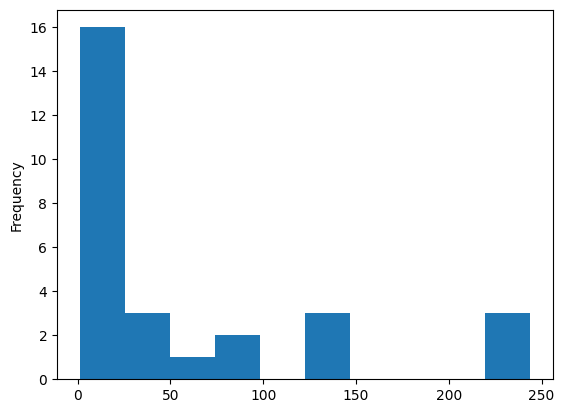

In [57]:
amazon['rating'].unique()
amazon['rating' ]  = amazon['rating'].str.replace('|','0')
amazon['rating'].value_counts().plot(kind = 'hist')

amazon['rating'] = amazon['rating'].astype(float)

In [58]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [59]:
amazon['rating_count'].unique()
amazon['rating_count'] = amazon['rating_count'].str.replace(',','')
amazon['rating_count']  = pd.to_numeric(amazon['rating_count'],errors = 'coerce',downcast='integer')

In [60]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [61]:
amazon['about_product']

,about_product
0,High Compatibility : Compatible With iPhone 12...
1,"Compatible with all Type C enabled devices, be..."
2,【 Fast Charger& Data Sync】-With built-in safet...
3,The boAt Deuce USB 300 2 in 1 cable is compati...
4,[CHARGE & SYNC FUNCTION]- This cable comes wit...
...,...
1460,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...
1461,"230 Volts, 400 watts, 1 Year"
1462,International design and styling|Two heat sett...
1463,Fan sweep area: 230 MM ; Noise level: (40 - 45...


#  What is the average rating for each product category

In [62]:
amazon.groupby('product_name')['rating'].mean()

,rating
product_name,
!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,4.5
!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!,3.4
"10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor",4.1
"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox",4.6
"3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3"" x 3"" Size | For notes, reminders, study, school and organizing",4.4
...,...
"realme Buds Wireless in Ear Bluetooth Earphones with mic, 11.2mm Bass Boost Driver, Magnetic Fast Pair, Fast Charging and 12 Hrs Playtime (Yellow)",4.1
"realme narzo 50 (Speed Blue, 4GB RAM+64GB Storage) Helio G96 Processor | 50MP AI Triple Camera | 120Hz Ultra Smooth Display",4.2
"realme narzo 50i (Mint Green, 2GB RAM+32GB Storage) Octa Core Processor | 6.5"" inch Large Display",4.0


(array([], dtype=float64), [])

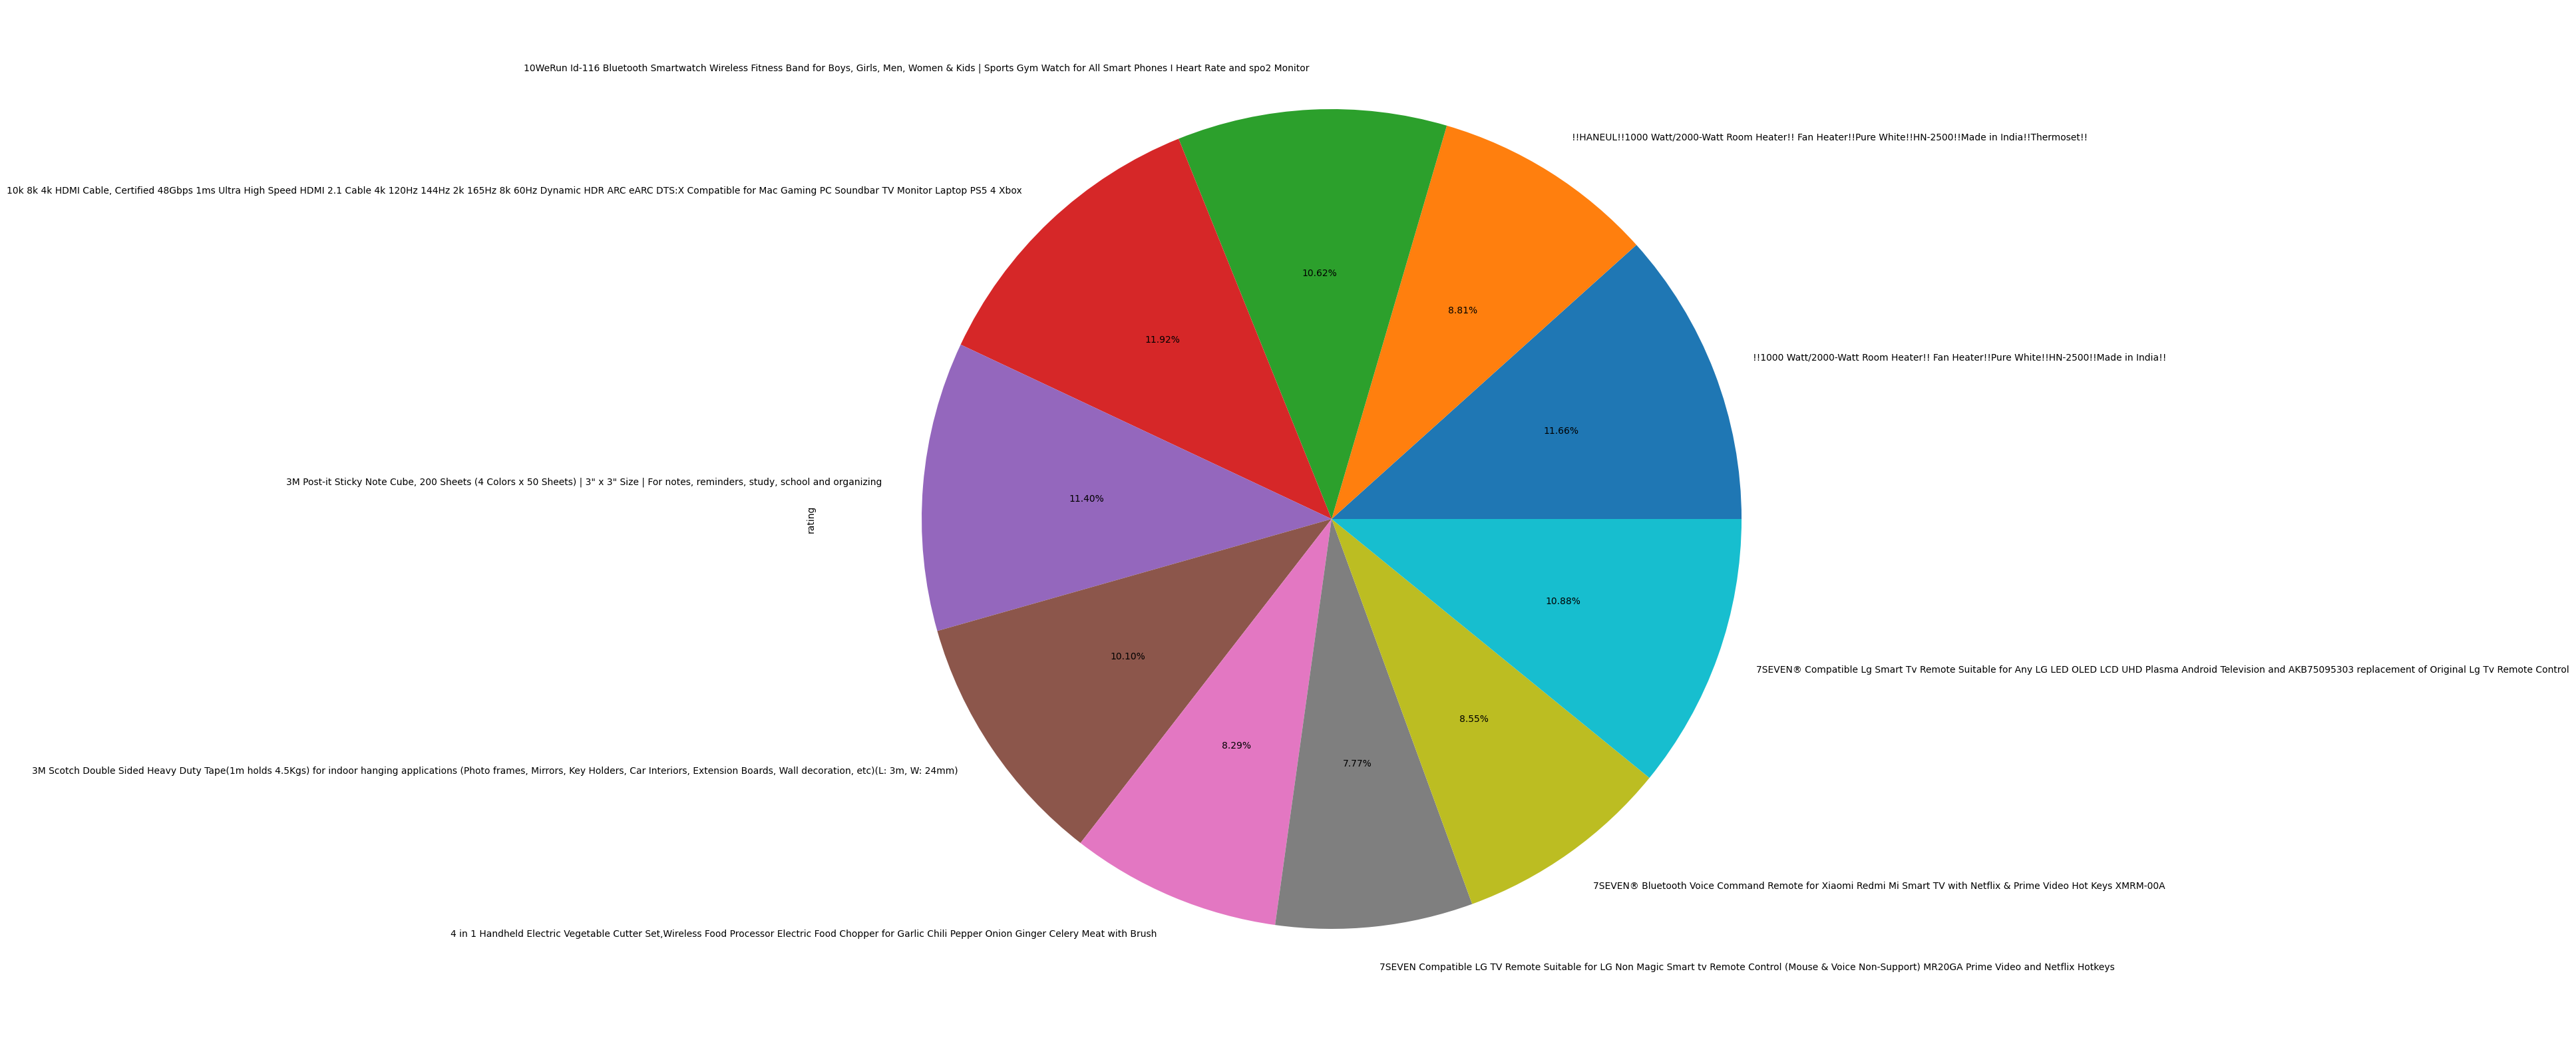

In [63]:
amazon.groupby('product_name')['rating'].mean().head(10).plot(kind = 'pie',autopct = '%.2f%%',figsize = (25,20))
plt.xticks(rotation  = 90)

# What are the top rating_count products by category

In [64]:
amazon.groupby('category')['rating'].count().sort_values(ascending = False).to_frame().head(10)

,rating
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233
Electronics|WearableTechnology|SmartWatches,76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52
"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders,27
"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|Irons|DryIrons",24
"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",24


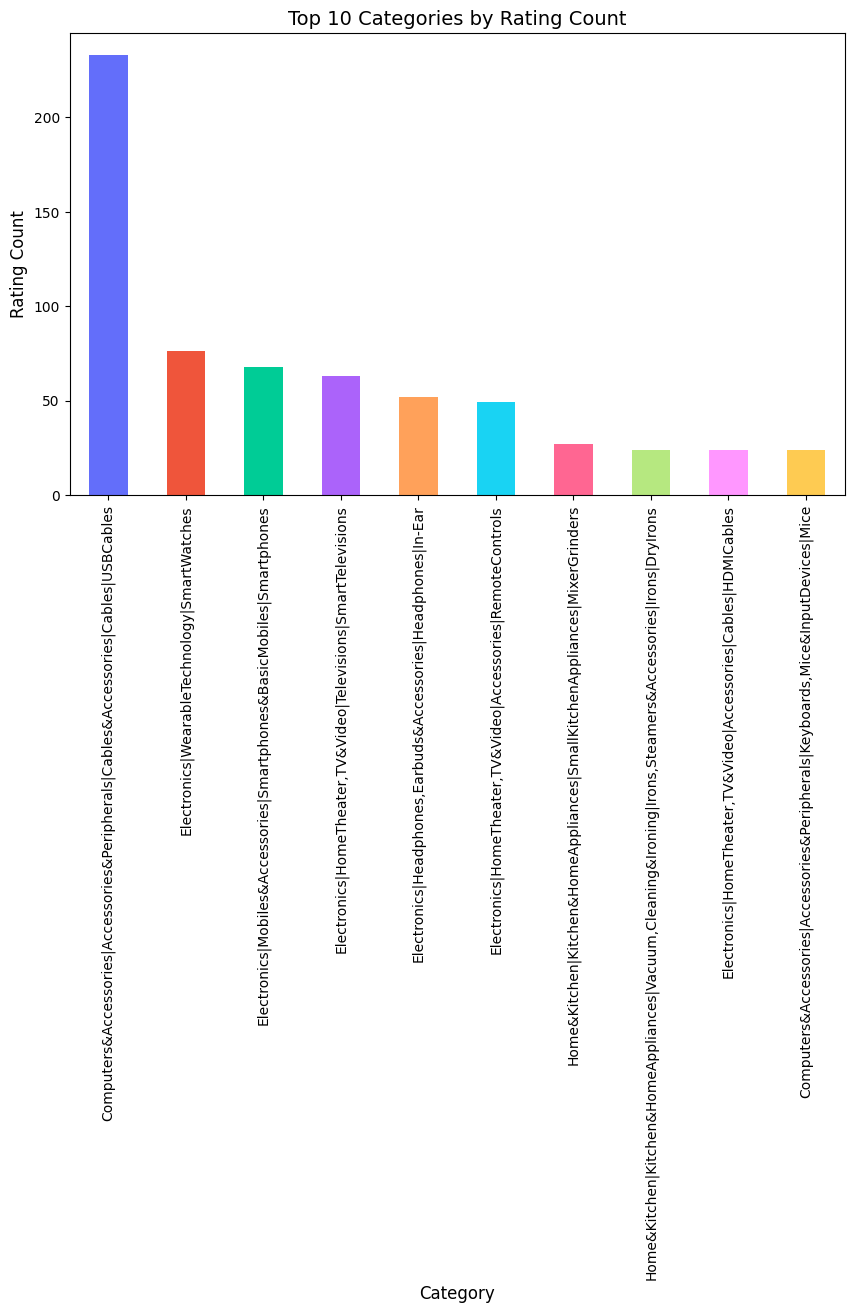

In [65]:
import matplotlib.pyplot as plt

# Group by 'category', count ratings, sort in descending order, and select top 10
top_categories = amazon.groupby('category')['rating'].count().sort_values(ascending=False).head(10)

# Plot the bar chart
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A',
          '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

top_categories.plot(kind='bar', color=colors, figsize=(10, 6))

# Add titles and labels
plt.title('Top 10 Categories by Rating Count', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Rating Count', fontsize=12)
plt.xticks(rotation=90)

plt.show()


#  What is the distribution of discounted prices vs. actual prices

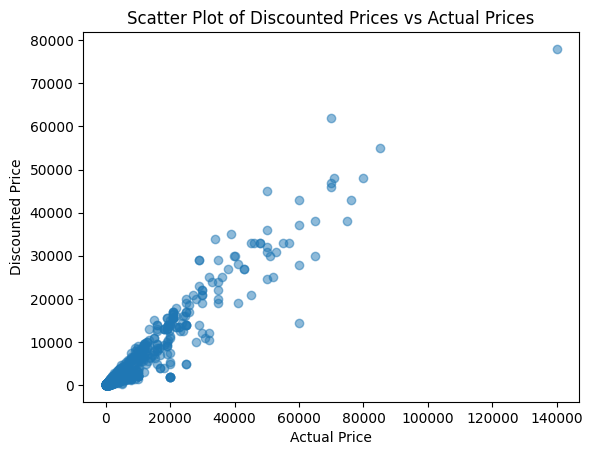

In [66]:
import matplotlib.pyplot as plt

# Assuming 'actual_price' and 'discounted_price' are your columns
plt.scatter(amazon['actual_price'], amazon['discounted_price'], alpha=0.5)
plt.title('Scatter Plot of Discounted Prices vs Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()


# here we can see that as actual price increases discounted price also increases it seems like a linear relationship

# 4. How does the average discount percentage vary across categories?

In [67]:
amazon.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


In [68]:
amazon.groupby('category')['discount_percentage'].mean().sort_values(ascending = False).head(20)

,discount_percentage
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors,0.900000
"Electronics|Headphones,Earbuds&Accessories|Earpads",0.900000
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms,0.900000
"Electronics|Headphones,Earbuds&Accessories|Adapters",0.880000
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers",0.875000
Electronics|Mobiles&Accessories|MobileAccessories|Mounts|Shower&WallMounts,0.820000
Computers&Accessories|Components|InternalHardDrives,0.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,0.785000
Electronics|Mobiles&Accessories|MobileAccessories|Stands,0.764000


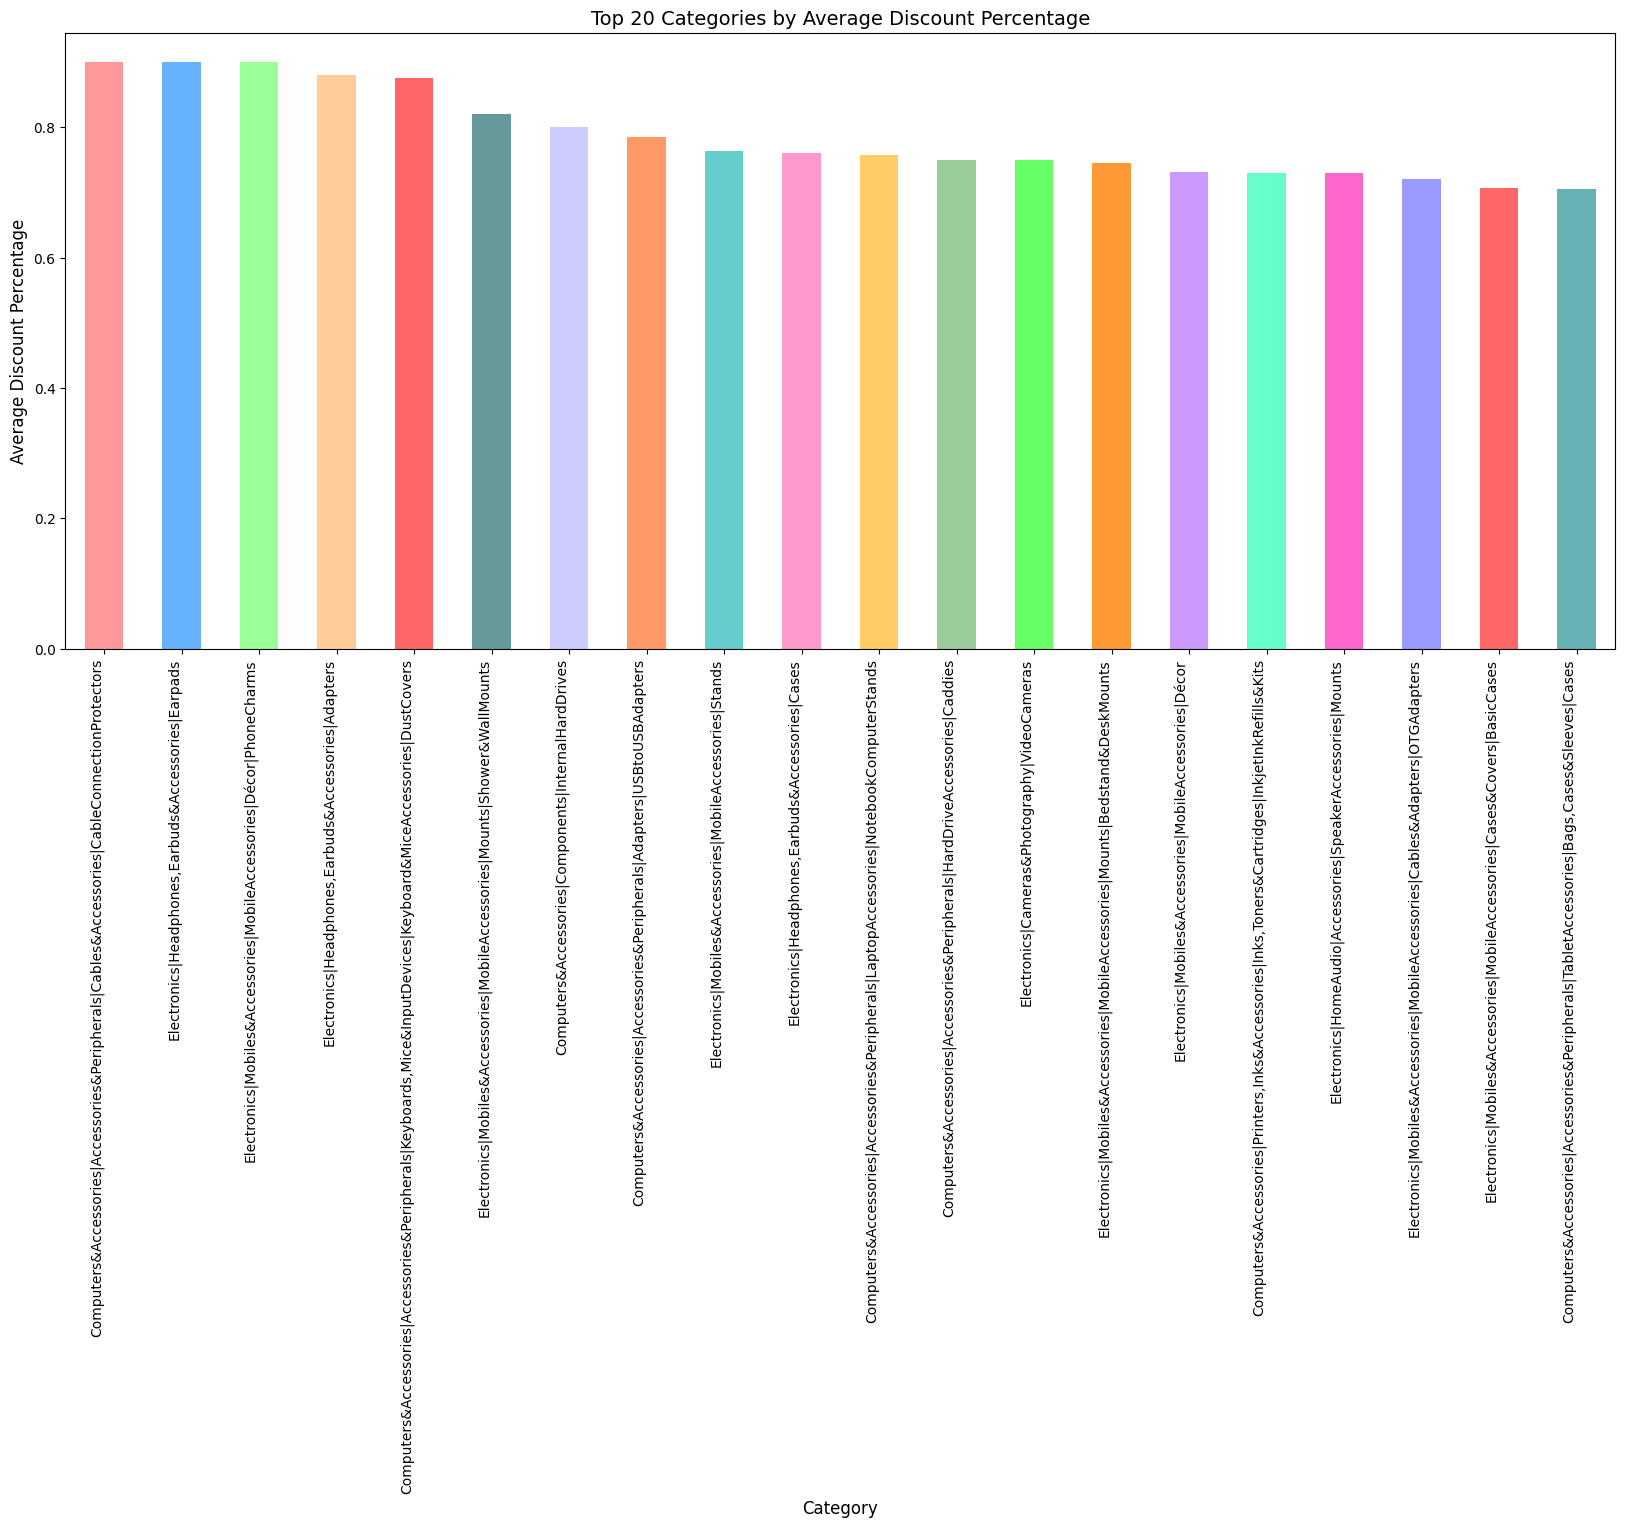

In [69]:
import matplotlib.pyplot as plt

# Assuming `top_20_categories` is the result of the groupby operation
top_20_categories = amazon.groupby('category')['discount_percentage'].mean().sort_values(ascending=False).head(20)

# Define a list of colors (you can customize this palette)
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF6666',
          '#669999', '#CCCCFF', '#FF9966', '#66CCCC', '#FF99CC',
          '#FFCC66', '#99CC99', '#66FF66', '#FF9933', '#CC99FF',
          '#66FFCC', '#FF66CC', '#9999FF', '#FF6666', '#66B2B2']

# Plotting the bar chart
plt.figure(figsize=(20, 8))  # Increase the figure size
top_20_categories.plot(kind='bar', color=colors)

# Add titles and labels
plt.title('Top 20 Categories by Average Discount Percentage', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Discount Percentage', fontsize=12)

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=90, ha='right', fontsize=10)

# Adjust layout to avoid label overlap
plt.tight_layout()

plt.show()


# 5. What are the most popular product names?

In [70]:
amazon.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


In [71]:
amazon.groupby('product_name')['rating_count'].sum().sort_values(ascending = False).head(20)

,rating_count
product_name,
"AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot",853945.0
"Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black",426973.0
"Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black",426973.0
"JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)",385177.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Taffy Pink),363713.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red),363713.0
boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black),363711.0
"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage) | Octa-core Helio G35 | 5000 mAh Battery",313836.0
"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Storage) | 2GHz Octa-core Helio G25 Processor | 5000 mAh Battery",313836.0


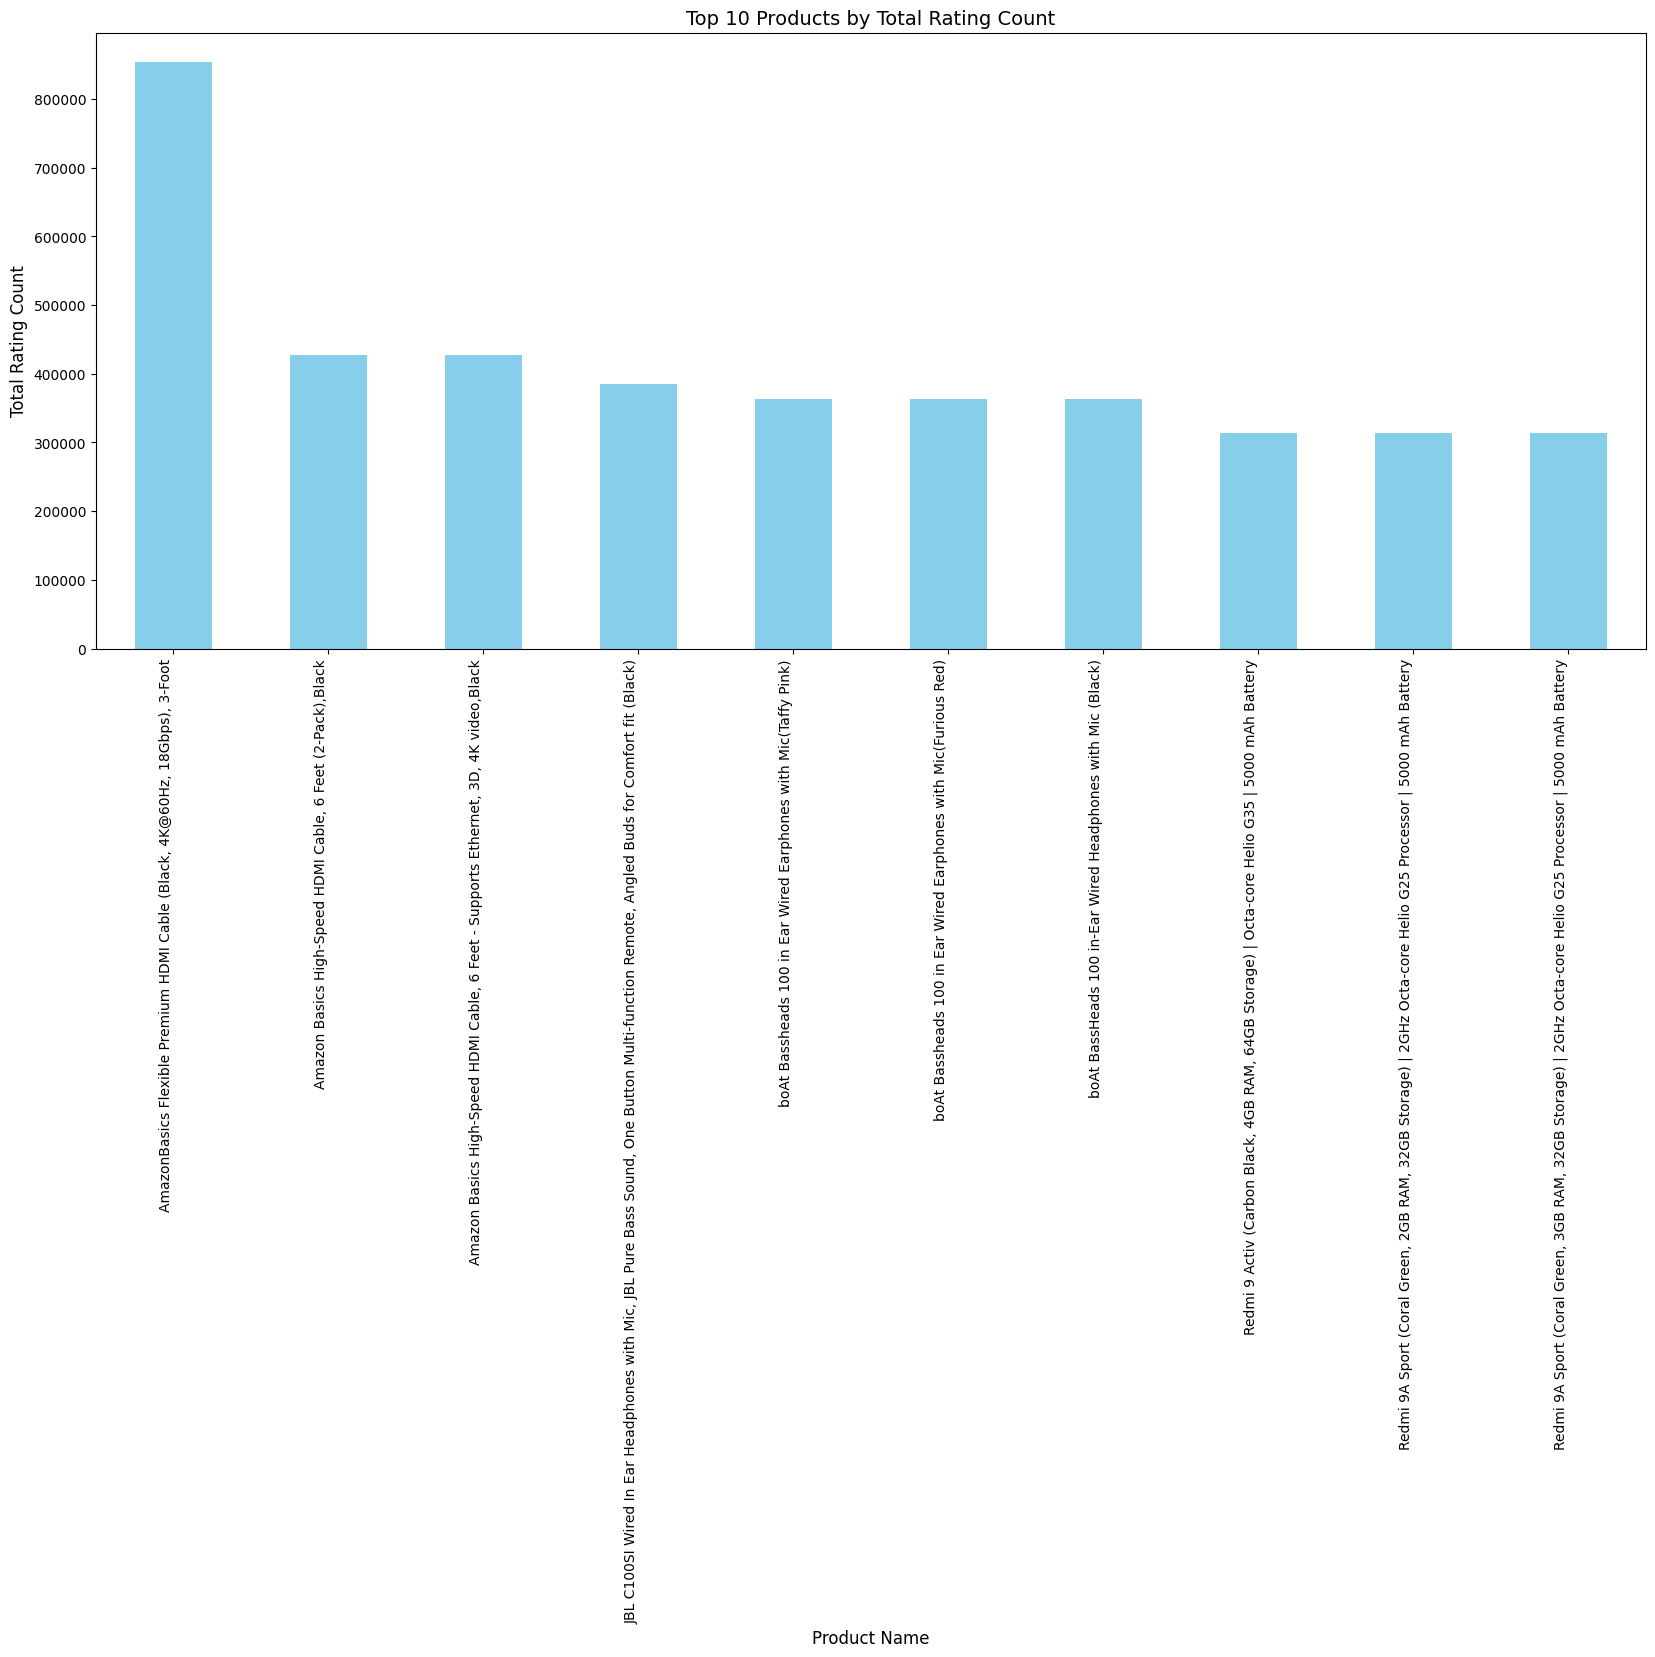

In [72]:
import matplotlib.pyplot as plt

# For rating counts
top_products_by_ratings = amazon.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(20, 8))
top_products_by_ratings.plot(kind='bar', color='skyblue')

plt.title('Top 10 Products by Total Rating Count', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Rating Count', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.tight_layout()

plt.show()



# 6. What are the most popular product keywords?

In [73]:
amazon.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [74]:
import pandas as pd
from collections import Counter
import re

# Sample DataFrame
# amazon = pd.read_csv('path_to_your_data.csv')

# Function to preprocess and extract keywords
def extract_keywords(text):
    if pd.isna(text):  # Handle missing values
        return []
    text = text.lower()  # Convert to lowercase
    words = re.findall(r'\b\w+\b', text)  # Tokenize and remove punctuation
    return words

# Combine relevant text columns into a single column
amazon['combined_text'] = amazon[['product_name', 'about_product', 'review_title', 'review_content']].fillna('').agg(' '.join, axis=1)

# Apply the keyword extraction function
all_keywords = amazon['combined_text'].apply(extract_keywords)

# Flatten the list of lists into a single list
flat_list = [item for sublist in all_keywords for item in sublist]

# Count keyword occurrences
keyword_counts = Counter(flat_list)

# Convert to DataFrame and sort
keyword_df = pd.DataFrame(keyword_counts.items(), columns=['keyword', 'count']).sort_values(by='count', ascending=False)

# Get the top 10 most popular keywords
top_keywords = keyword_df.head(10)

print(top_keywords)


    keyword  count
77      the  19349
8       and  15897
4        to  12592
87       is  12323
51       it  11761
13      for  11309
134    good  10451
55        a   8754
159       i   7747
35     with   7495


In [75]:
import plotly.express as px

# Create a bar chart for top keywords
fig = px.bar(top_keywords,
             x='keyword',
             y='count',
             title='Top 10 Most Popular Product Keywords',
             color='keyword',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(xaxis_title='Keyword',
                  yaxis_title='Count',
                  xaxis_tickangle=-45,
                  title_x=0.5,
                  height=600)

fig.show()


# 7. What are the most popular product reviews?

In [76]:
amazon.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,combined_text
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Wayona Nylon Braided USB to Lightning Fast Cha...


In [77]:
# Sort reviews by 'rating_count' to find the most popular ones
popular_reviews = amazon[['review_title', 'review_content', 'rating_count']].sort_values(by='rating_count', ascending=False).head(10)

print(popular_reviews)


                                          review_title  \
47   It's quite good and value for money,Works well...   
12   It's quite good and value for money,Works well...   
65   It's quite good and value for money,Works well...   
684  It's quite good and value for money,Works well...   
352  Best value for money,HEAD PHONE POUCH NOT RECE...   
400  Best value for money,HEAD PHONE POUCH NOT RECE...   
584  Best value for money,HEAD PHONE POUCH NOT RECE...   
371  Best phone for below normal use,Good mobile fo...   
370  Best phone for below normal use,Good mobile fo...   
473  Best phone for below normal use,Good mobile fo...   

                                        review_content  rating_count  
47   I am using it for 14 days now. The experience ...      426973.0  
12   I am using it for 14 days now. The experience ...      426973.0  
65   I am using it for 14 days now. The experience ...      426973.0  
684  I am using it for 14 days now. The experience ...      426972.0  
352  T

<Axes: >

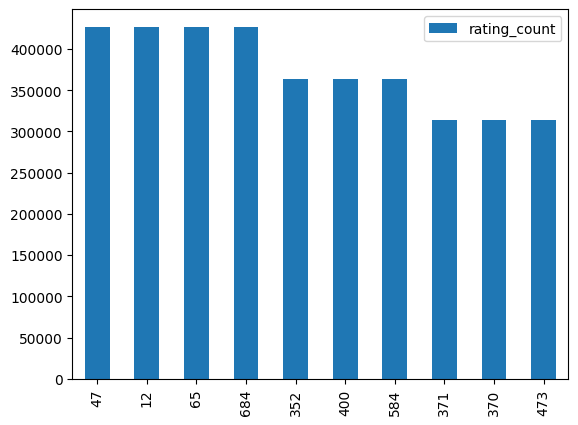

In [78]:
amazon[['review_title', 'review_content', 'rating_count']].sort_values(by='rating_count', ascending=False).head(10).plot(kind = 'bar')

# 8. What is the correlation between discounted_price and rating?

In [79]:
amazon.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,combined_text
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Wayona Nylon Braided USB to Lightning Fast Cha...


<Axes: >

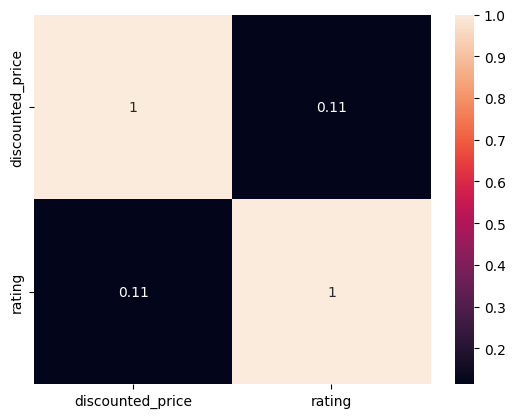

In [80]:
corr_matrix = amazon[['discounted_price','rating']].corr()
sns.heatmap(corr_matrix,annot = True)

# From the above we can conclude that rating doesn't gets affected by discount_price

# 9. What are the Top 5 categories based on the highest ratings?

In [81]:
amazon.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,combined_text
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Wayona Nylon Braided USB to Lightning Fast Cha...


In [82]:
amazon.groupby('category')['rating'].sum().sort_values(ascending = False).head(5)

,rating
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,967.4
Electronics|WearableTechnology|SmartWatches,305.9
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,278.8
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",265.2
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",202.7


# 10. Identify any potential areas for improvement or optimization based on the data analysis.

# From the above data analysis i got to know as discount increases sale increases

# EDA on spotify data

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [84]:
spotify = pd.read_csv('/content/spotify.csv')

In [85]:
spotify.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


# 1.Load the dataframe and ensure data quality by checking for missing values and duplicate rows.Handle missing values and remove duplicate rows if necessary.


In [92]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB


In [93]:
# check for missing values
spotify.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [94]:
# check for duplicates
spotify.duplicated().sum()

0

In [95]:
# drop the duplicated
spotify.drop_duplicates(inplace = True)

In [96]:
# generating a small description of my data
spotify.describe()

,Popularity,Duration (ms)
count,413.000000,413.000000
mean,75.384988,206358.496368
std,9.789010,53980.643666
min,29.000000,81666.000000
25%,70.000000,172185.000000
50%,76.000000,201480.000000
75%,82.000000,235093.000000
max,97.000000,501648.000000


In [91]:
spotify.describe(include = 'object')

,Artist,Track Name,Track ID
count,413,413,413
unique,115,412,413
top,Drake,Dial Drunk (with Post Malone),4hGmQboiou09EwhcTWa0H6
freq,17,2,1


# 2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

In [106]:
spotify.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [97]:
spotify.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


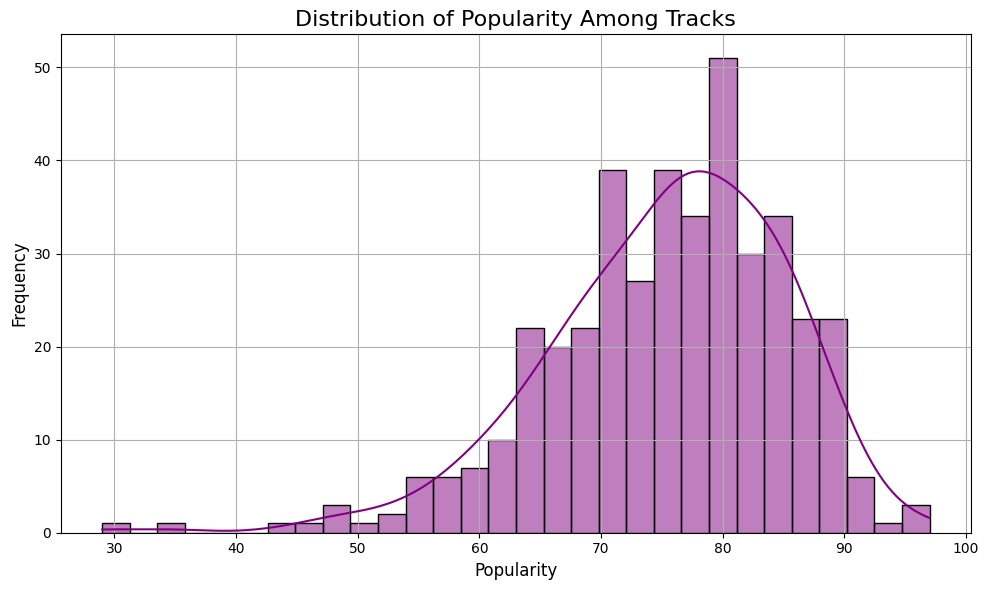

In [107]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Create a histogram for the 'Popularity' column
sns.histplot(spotify['Popularity'], bins=30, kde=True, color='purple')

# Add labels and title
plt.title('Distribution of Popularity Among Tracks', fontsize=16)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


# 3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

In [109]:
spotify.head(1)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6


<Axes: xlabel='Popularity', ylabel='Duration (ms)'>

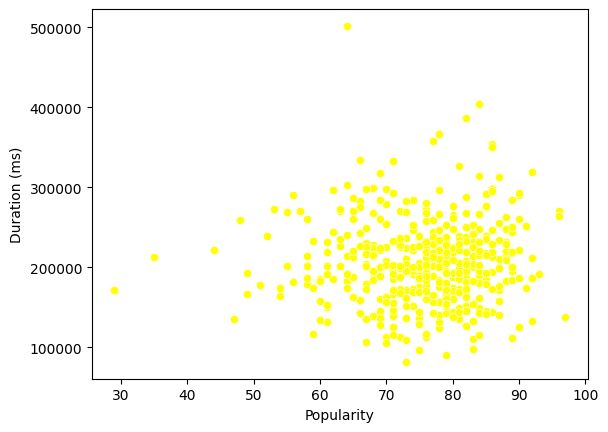

In [112]:
sns.scatterplot(data = spotify,x = 'Popularity',y = 'Duration (ms)',color = 'yellow')

# no there is not direct relationship between popularity and duration of songs

# 4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artistusing a countplot.

In [114]:
spotify.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


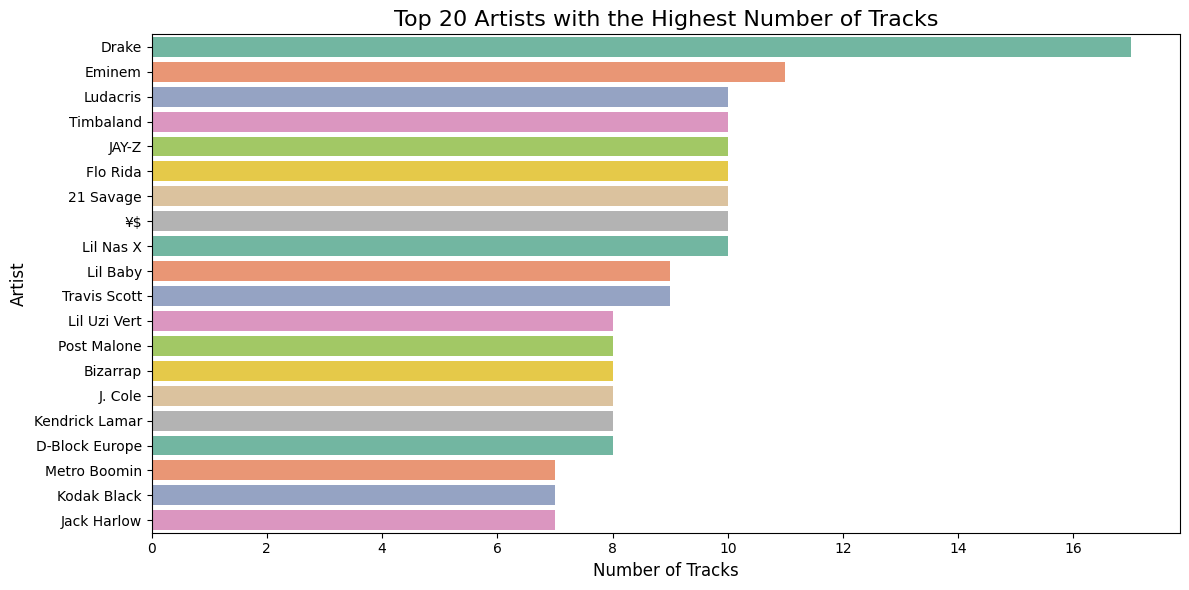

In [124]:
# Group by 'Artist' and count the number of tracks, then sort and get the top 20 artists
top_artists = spotify['Artist'].value_counts().head(20)

# Plot the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=spotify, y='Artist', order=top_artists.index, palette='Set2')

# Add labels and rotate x-ticks
plt.title('Top 20 Artists with the Highest Number of Tracks', fontsize=16)
plt.xlabel('Number of Tracks', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


# 5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [125]:
spotify.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [128]:
# Sort the dataset by 'Popularity' in ascending order to get the least popular tracks
least_popular_tracks = spotify[['Artist', 'Track Name', 'Popularity']].sort_values(by='Popularity', ascending=True).head(5)

# Display the result
print(least_popular_tracks)


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


# 6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [138]:
# Group by 'Artist' and calculate the average popularity for each artist
average_popularity_per_artist = spotify.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

# Get the top 5 artists based on average popularity
top_5_artists = average_popularity_per_artist.head(5)

# Display the top 5 artists and their average popularity
print(top_5_artists)

# Find the artist with the highest average popularity
most_popular_artist = top_5_artists.idxmax()
highest_average_popularity = top_5_artists.max()

print(f'The artist with the highest average popularity is {most_popular_artist} with an average popularity of {highest_average_popularity:.2f}')


Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64
The artist with the highest average popularity is cassö with an average popularity of 92.00


#  7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [140]:
# Group by 'Artist' and calculate the average popularity for each artist
average_popularity_per_artist = spotify.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

# Get the top 5 artists based on average popularity
top_5_artists = average_popularity_per_artist.head(5).index

# Filter the dataset for the top 5 artists and find their most popular tracks
most_popular_tracks = []

for artist in top_5_artists:
    # For each artist, find the track with the highest popularity
    most_popular_track = spotify[spotify['Artist'] == artist].sort_values(by='Popularity', ascending=False).head(1)
    most_popular_tracks.append(most_popular_track[['Artist', 'Track Name', 'Popularity']])

# Concatenate the results into a single dataframe and display
most_popular_tracks_df = pd.concat(most_popular_tracks)
print(most_popular_tracks_df)


           Artist                    Track Name  Popularity
140         cassö                         Prada          92
241        Trueno  Mamichula - con Nicki Nicole          89
200  David Guetta            Baby Don't Hurt Me          87
30   Travis Scott    FE!N (feat. Playboi Carti)          93
260            ¥$                      CARNIVAL          96


# 8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.


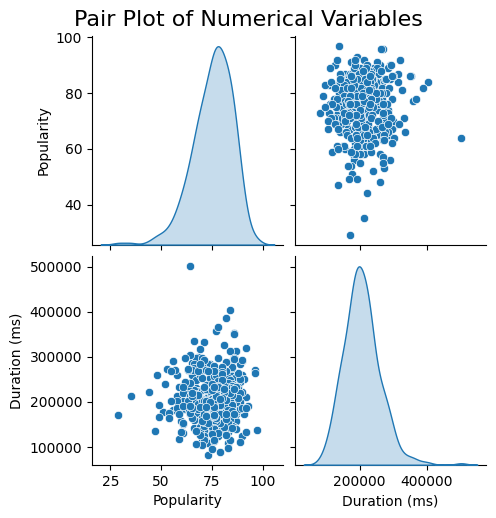

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns you want to include in the pair plot
numerical_cols = ['Popularity', 'Duration (ms)']  # Add other numerical columns if needed

# Create the pair plot
sns.pairplot(spotify[numerical_cols], diag_kind='kde', palette='Set2')

# Display the plot
plt.suptitle('Pair Plot of Numerical Variables', y=1.02, fontsize=16)  # Adjust title position
plt.show()


# 9.Does the duration of tracks vary significantly across different artists?Explore this visually using a box plot or violin plot.

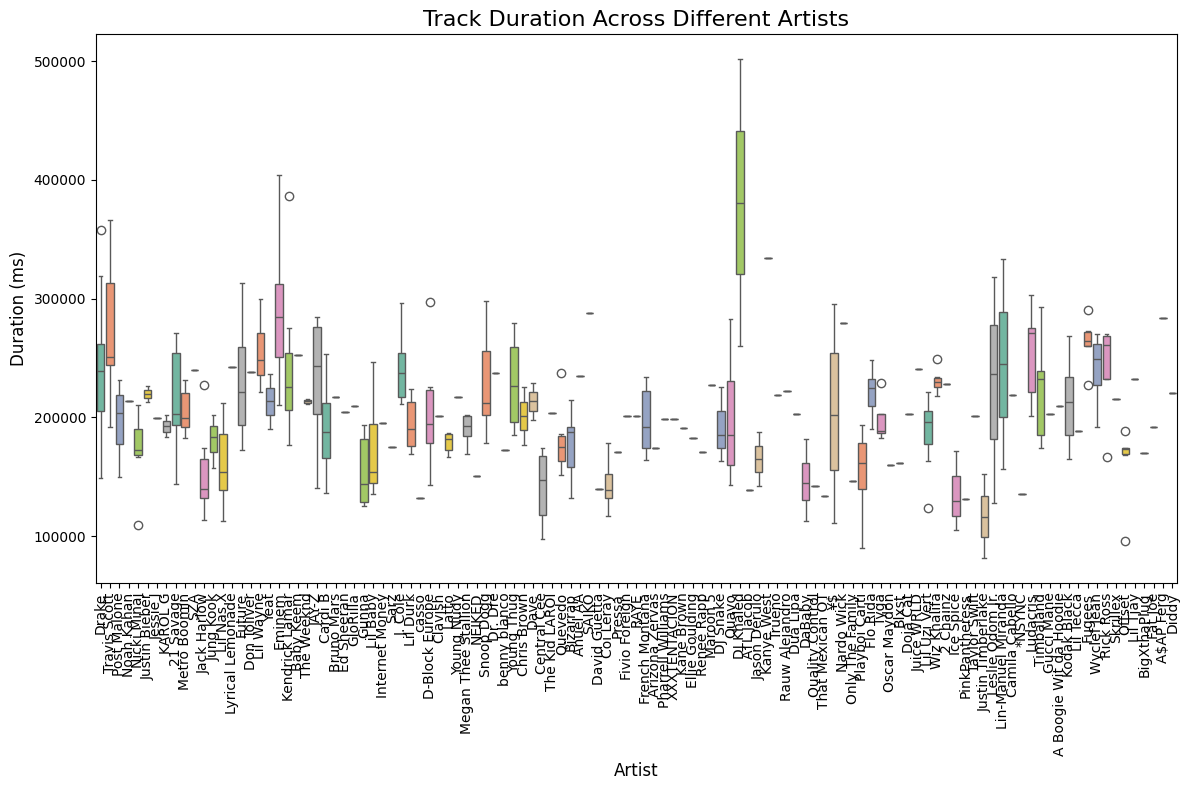

In [142]:
# using a box plot
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for track duration across different artists
plt.figure(figsize=(12, 8))
sns.boxplot(data=spotify, x='Artist', y='Duration (ms)', palette='Set2')

# Add labels and title
plt.title('Track Duration Across Different Artists', fontsize=16)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Duration (ms)', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()

# Show the plot
plt.show()


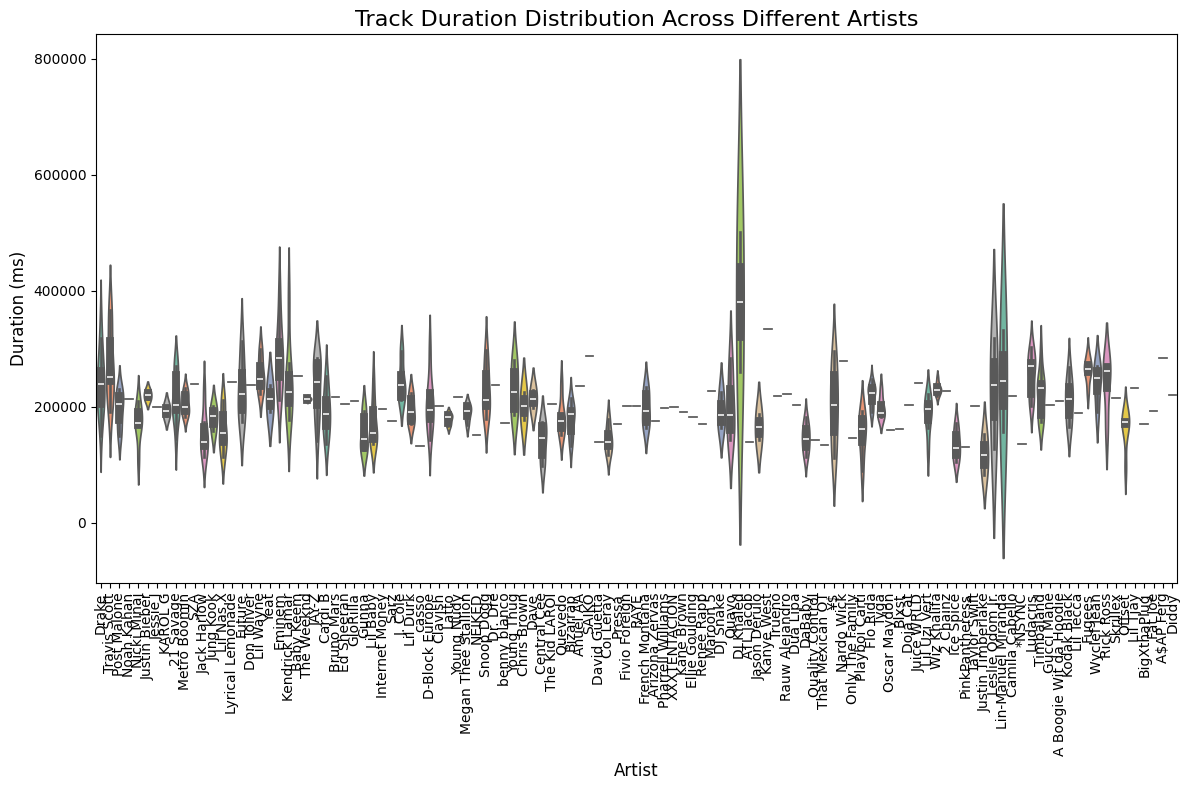

In [143]:
# using a violin plot
# Create a violin plot for track duration across different artists
plt.figure(figsize=(12, 8))
sns.violinplot(data=spotify, x='Artist', y='Duration (ms)', palette='Set2')

# Add labels and title
plt.title('Track Duration Distribution Across Different Artists', fontsize=16)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Duration (ms)', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()

# Show the plot
plt.show()


# 10.How does the distribution of track popularity vary for different artists?Visualize this using a swarm plot or a violin plot.

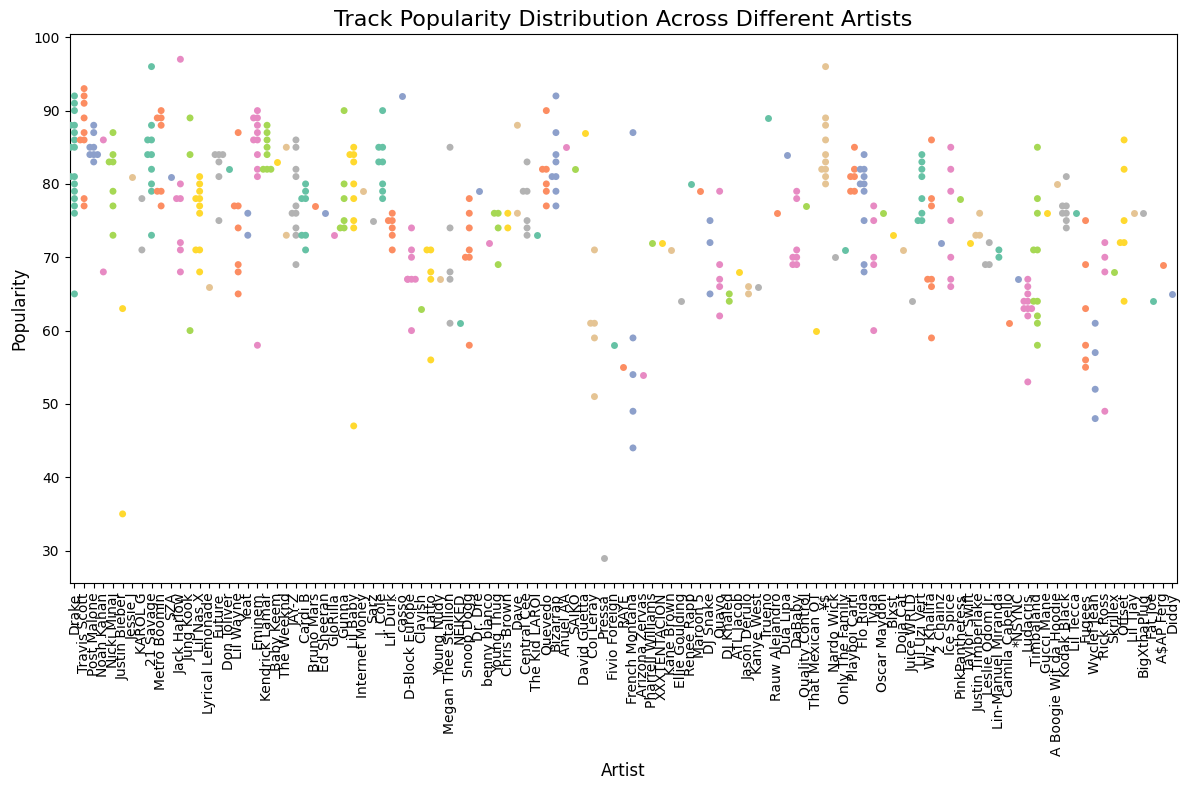

In [144]:
# usign swarm
# Create a swarm plot for track popularity across different artists
plt.figure(figsize=(12, 8))
sns.swarmplot(data=spotify, x='Artist', y='Popularity', palette='Set2')

# Add labels and title
plt.title('Track Popularity Distribution Across Different Artists', fontsize=16)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()

# Show the plot
plt.show()


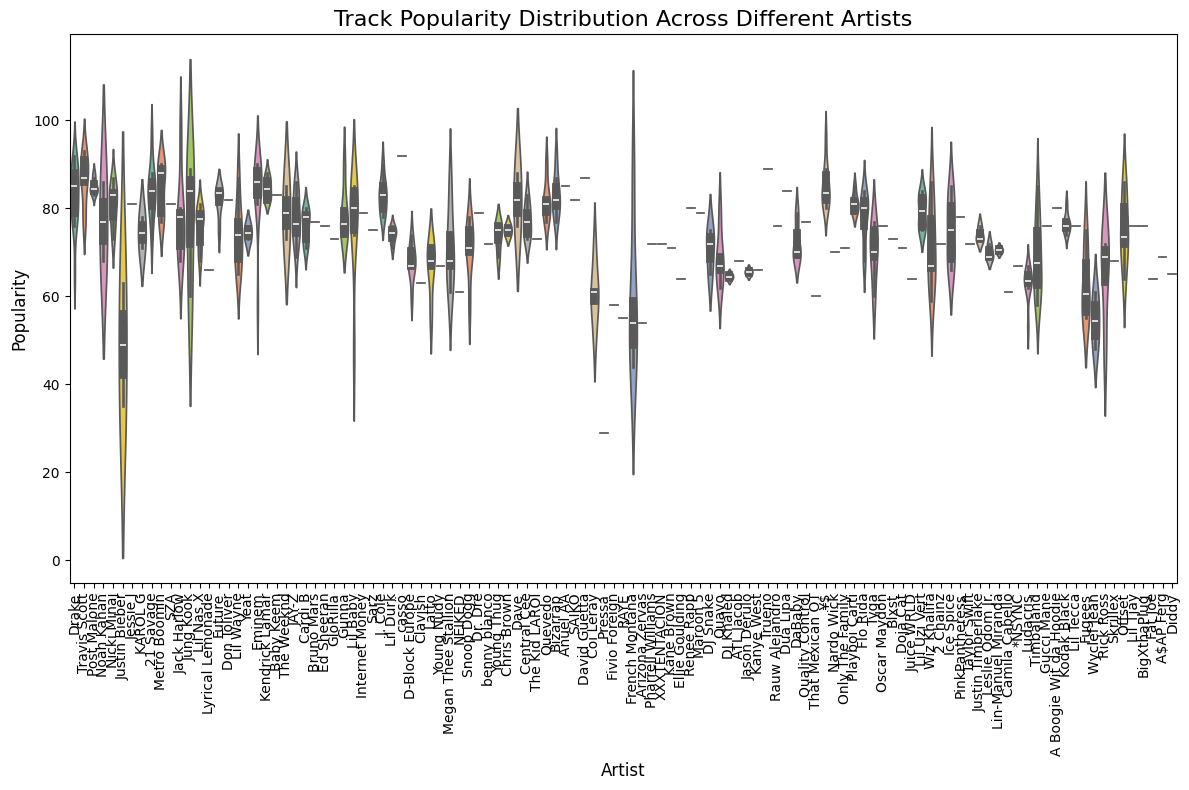

In [145]:

# Create a violin plot for track popularity across different artists
plt.figure(figsize=(12, 8))
sns.violinplot(data=spotify, x='Artist', y='Popularity', palette='Set2')

# Add labels and title
plt.title('Track Popularity Distribution Across Different Artists', fontsize=16)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()

# Show the plot
plt.show()
